## Artificial Intelligence (AI) vs. Machine Learning (ML) vs. Neural Networks (NN)

### Artificial Intelligence (AI):
- Machines/software doing things typically requiring human intelligence
- [simple rule-based systems (if/else statements) -> more complex problem solving (NLP, CV)]
- Aims to offload cognitive work

### Machine Learning (ML):
- A subset of AI that focuses on building systems that can learn from data and improve performance over time without being explicitly programmed.
- Learning from data (gets better over time / as it learns)
- Supervised learning (something from something), Unsupervised learning (something from nothing), and Reinforcement learning (how children learn).

### Neural Networks (NN):
- A subset of ML inspired by of  human brain. 
- Multilayer Perceptron 
- Made of layers of nodes (neurons) that process input data and pass it through activation functions with backpropagation to produce outputs.

### Intuition, Why use machine learning:
- Another problem solving paradigm (similar as to why we learn iteration, recursion, divide & conquer, backtracking, dynamic programming, etc) but for when we don't know what goes on from input to output
- Self driving cars: what is a human vs a car vs stop sign
- <strong>Devolve Curve-fitting problem</strong>

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

#### Simple Linear Graph

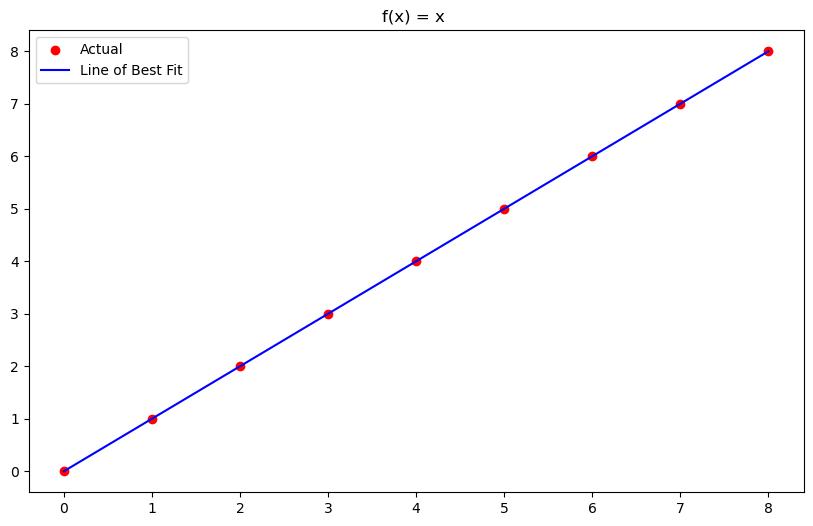

In [2]:
x = np.arange(0,9,1)
y = np.arange(0,9,1)

a, b = np.polyfit(x, y, 1)

plt.figure(figsize=(10,6))
plt.title("f(x) = x ")
plt.scatter(x, y, color = 'r')
plt.plot(x, a*x+b, color = 'b')
plt.legend(['Actual', 'Line of Best Fit'])
plt.show()

#### Approximately Linear Data

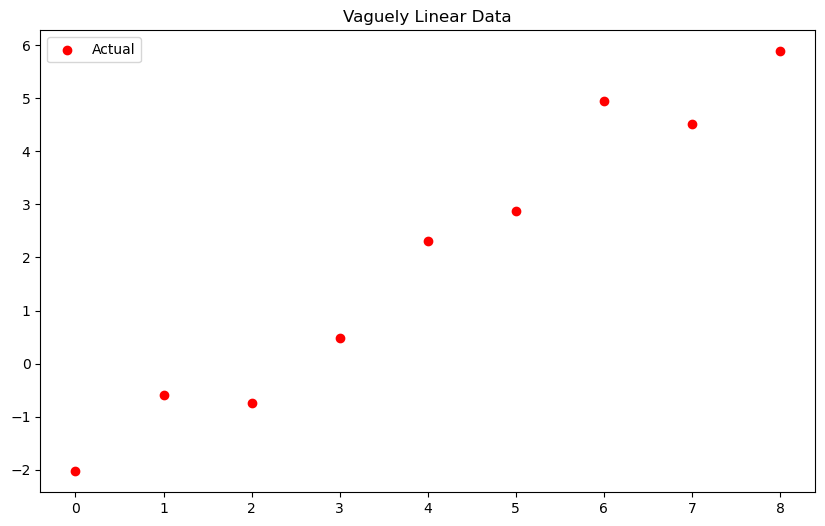

In [3]:
from scipy import stats

x = np.arange(0,9)
y = np.array([point + (np.random.rand() * 2 - 3) for point in x])

plt.figure(figsize=(10,6))
plt.title("Vaguely Linear Data")
plt.scatter(x, y, color="r")
plt.legend(['Actual'])
plt.show()

#### Linear Regression

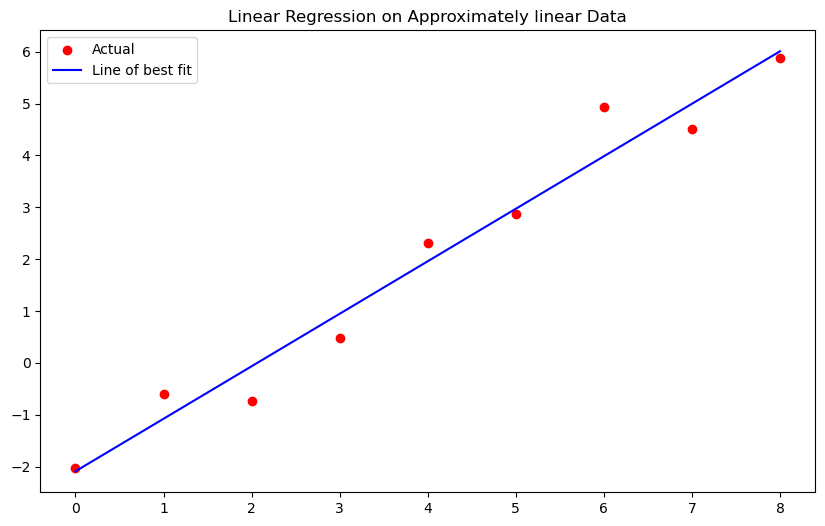

Slope: 1.0118984228946533 y-intercept: -2.0882059428698474 r-value (correlation coefficient): 0.9825423302251693 
r^2 (coefficient of determination): 0.9653894306843057 p-value: 2.2755934882075967e-06 Standard Error: 0.0724170785834229


In [4]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

plt.figure(figsize=(10,6))
plt.title("Linear Regression on Approximately linear Data")
plt.scatter(x, y , color = 'r')
plt.plot(x, slope * x + intercept, color = 'b')
plt.legend(['Actual', 'Line of best fit'])
plt.show()

print(f"Slope: {slope} y-intercept: {intercept} r-value (correlation coefficient): {r} \nr^2 (coefficient of determination): {r*r} p-value: {p} Standard Error: {std_err}")

#### What if data is non linear?

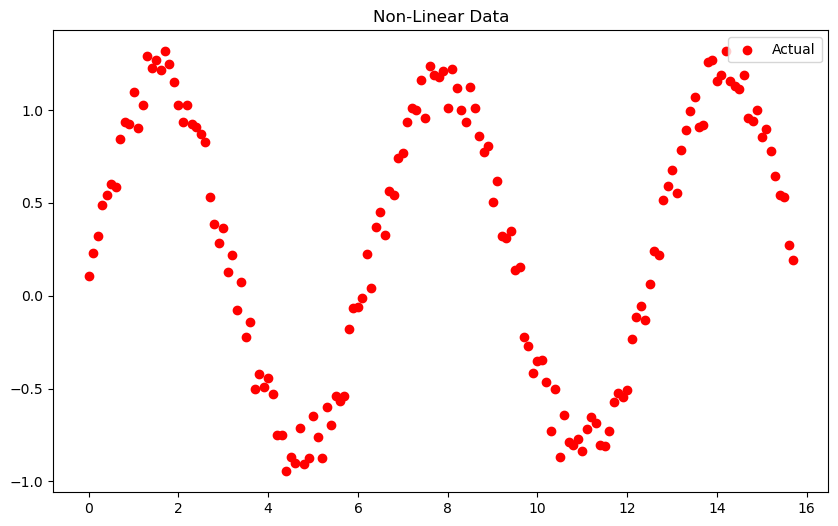

In [5]:
x = np.arange(0, 5*np.pi, 0.1)
y = np.array([point + np.random.rand()/3 for point in np.sin(x)]) # noise


plt.figure(figsize=(10,6))
plt.title('Non-Linear Data')
plt.scatter(x, y, color = 'r')
plt.legend(["Actual"])
plt.show()

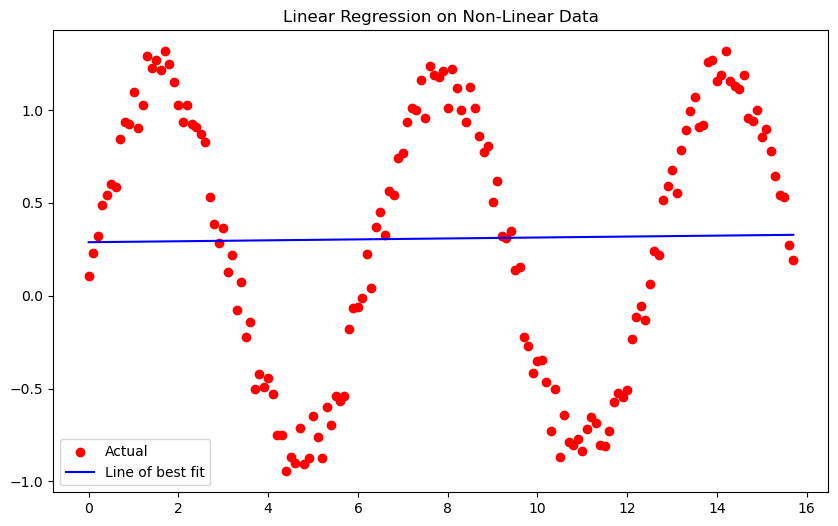

Slope: 0.002533099970462914 y-intercept: 0.28840678908365625 r-value (correlation coefficient): 0.016262962293891636 
r^2 (coefficient of determination): 0.0002644839425725411 p-value: 0.8392815909225443 Standard Error: 0.012469037642928988


In [6]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

plt.figure(figsize=(10,6))
plt.title("Linear Regression on Non-Linear Data")
plt.scatter(x, y , color = 'r')
plt.plot(x, slope * x + intercept, color = 'b')
plt.legend(['Actual', 'Line of best fit'])
plt.show()
print(f"Slope: {slope} y-intercept: {intercept} r-value (correlation coefficient): {r} \nr^2 (coefficient of determination): {r*r} p-value: {p} Standard Error: {std_err}")

#### Use Other Regressions!
- Many Different Approaches, so just choosing the most relevant (my favorites)

- **Support Vector Regression (SVR):**
  - Type of Support Vector Machine (SVM) altered for regression tasks 
  - inputs -> higher dimension where linear regression works 


- **Stochastic Gradient Descent Regression (SGD Regression) (Still Linear):**
  - Type of gradient descent where a sample (a batch) is used to update the model's parameters at each iteration (learning).
  - Used in deep learning models for optimizing non-linear networks. (optimization function)


- **Multilayer Perceptron:**
  - Dense NN with multiple layers, typically: input layer -> hidden layers(s) -> output layer(s) -> FAANG Job
  - Each neuron in hidden layers applies a non-linear activation function (e.g., ReLU, sigmoidm tanh) to model complex, non-linear relationships.
  - MLPs are trained using backpropagation and gradient descent techniques to minimize the error between predicted and actual values. (Learning)

- **Random Forest Regressor:**
  - Ensemble learning method w/ multiple decision trees during training and outputs the average prediction trees.
  - Handles non-linear relationships effectively by averaging over many trees, reducing overfitting and variance.
  - Robust to outliers and capable of modeling complex interactions between features.
  - Big W



#### SVR

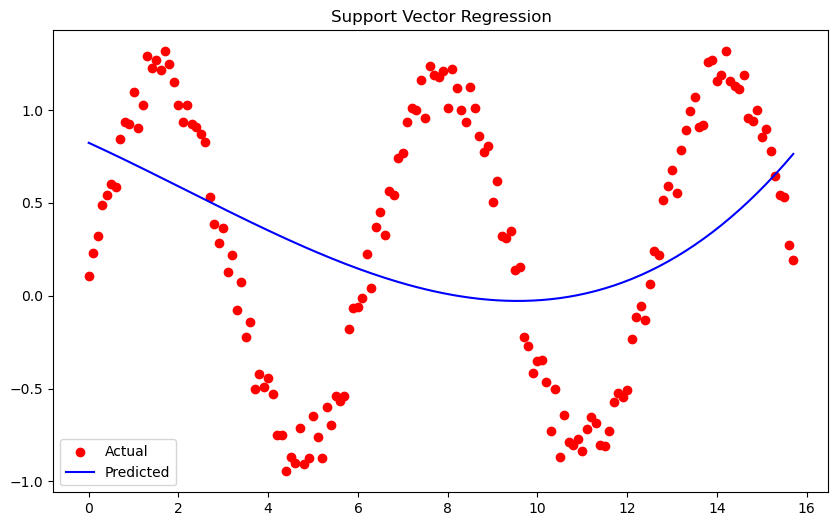

In [7]:
from sklearn.svm import SVR

# Reshaping Model
x = x.reshape(-1,1)
y = y.reshape(-1,1).ravel()

# Regression Model
svr = SVR(kernel="poly", C=1, gamma="auto", degree=3, epsilon=0.1, coef0=1)

# Plotting
plt.figure(figsize=(10,6))
plt.title("Support Vector Regression")
plt.scatter(x, y, color = 'r')
plt.plot(x, svr.fit(x, y).predict(x), color = 'b')
plt.legend(['Actual', 'Predicted'])
plt.show()

#### SGD

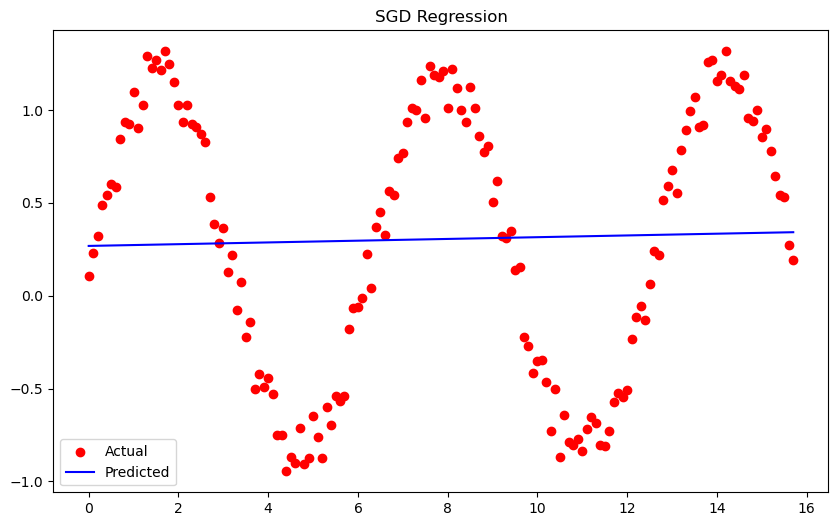

In [8]:
from sklearn.linear_model import SGDRegressor

# Regression Model
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate="adaptive", eta0=0.01)

# Plotting
plt.figure(figsize=(10, 6))
plt.title("SGD Regression")
plt.scatter(x, y, color='r')
plt.plot(x, sgd_reg.fit(x, y).predict(x), color = 'b')
plt.legend(['Actual', 'Predicted'])
plt.show()

#### MLP

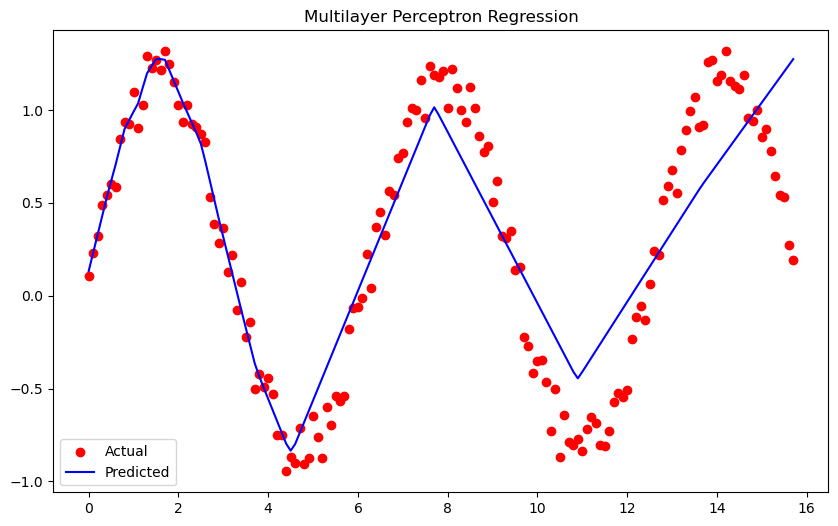

In [9]:
from sklearn.neural_network import MLPRegressor

# Regression Model
mlp_reg = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, activation='relu', solver='adam', random_state=42)

# Plotting
plt.figure(figsize=(10, 6))
plt.title("Multilayer Perceptron Regression")
plt.scatter(x, y, color='r')
plt.plot(x, mlp_reg.fit(x, y).predict(x), color = 'b')
plt.legend(['Actual', 'Predicted'])
plt.show()


#### Random Forrest Regressor
Deserves a whole lecture on its own

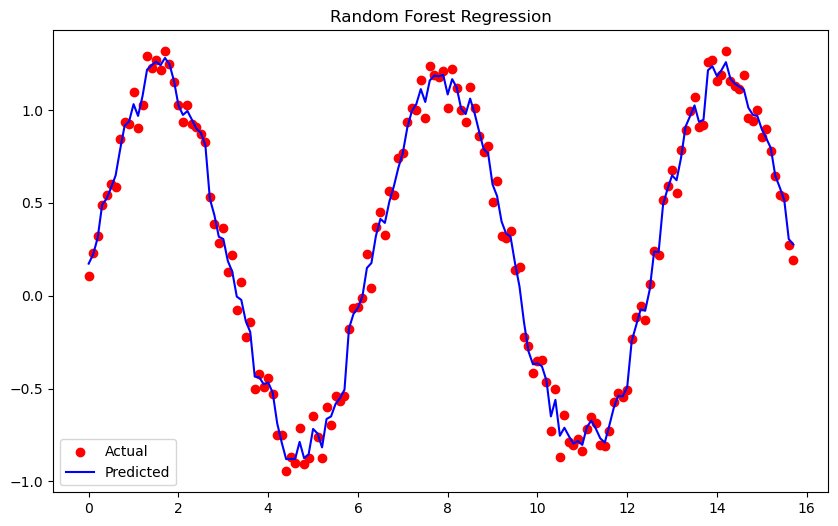

Mean Absolute Error: 0.03738800646926402


In [10]:
from sklearn.ensemble import RandomForestRegressor

# Regression Model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
pred = rf_reg.fit(x,y).predict(x)

# Plotting
plt.figure(figsize=(10, 6))
plt.title("Random Forest Regression")
plt.scatter(x, y, color='r')
plt.plot(x, pred, color='b')
plt.legend(['Actual', 'Predicted'])
plt.show()
print(f"Mean Absolute Error: {np.mean(np.abs((pred-y)))}")